# Introduction to Python

## 1. Installing Python


## 2. The Language

- Expressions

- List, Tuple and Dictionary

- Strings

- Functions

## 3. Example: Word Frequency Analysis with Python

- Reading text files

- Geting and using python packages : wordcloud

- Histograms

- Exporting data as text files



## 1. Installing Python:
    
  - Easy way : with a Python distribution, anaconda
    
    https://www.continuum.io/downloads
    
  - Hard way : compile it yourself from source. It is open-source after all.
   
    [Not covered here; was the main way in early days, before 2011 or even 2014]
    

Three Python user interfaces

  - Python Shell `python`
  
    ```
        [yfeng1@waterfall ~]$ python
        Python 2.7.12 (default, Sep 29 2016, 13:30:34) 
        [GCC 6.2.1 20160916 (Red Hat 6.2.1-2)] on linux2
        Type "help", "copyright", "credits" or "license" for more information.
        >>> 
    ```
  
  - Jupyter Notebook (in a browser, like this)
  
  - IDEs: PyCharm, Spyder, etc.
  
  We use Jupyter Notebook here.
  
  Jupyter Notebook is included in the Anaconda distribution.
  
  

# 2. Python the Language

## 2.1 Expressions

An expression looks like a math formula

In [1]:
2 + 3 # Press <Ctrl-Enter to evaluate a cell>

5

In [2]:
2 + int(3.5 * 4) * float("8")

114.0

In [3]:
9 // 2 # Press <Ctrl-Enter to evaluate>

4

To use the result of an expression in the future,
we assign an expression to a variable.

- Type of a variable in python is usually implied.
  (duck-typing -- read more on https://en.wikipedia.org/wiki/Duck_typing)

In [4]:
x = 2 + 3

In [5]:
x

5

The weirdest expression in Python:

In [6]:
print(x)

5


Q: What happens under the hood?

## 2.2 List, Tuple, Set and Dictionary

A list is a list of expressions.

In [7]:
MyListOfNumbers = [1,2,3,4,5,6,7]

A list has a length

In [8]:
len(MyListOfNumbers)

7

We can loop over items in a list.

In [9]:
for num in MyListOfNumbers:
    print(num, end=', ')

1, 2, 3, 4, 5, 6, 7, 

A tuple is almost a list, defined with `()` instead of `[]`.
`()` can sometimes be omitted.

In [10]:
MyTupleOfNumbers = (1, 2, 3, 4, 5, 6)
MyTupleOfNumbers = 1, 2, 3, 4, 5, 6
for num in MyTupleOfNumbers:
    print(num, end=', ')

1, 2, 3, 4, 5, 6, 

But Tuples have a twist.

- Items in a tuple is immutable;
- Items in a list can change

Let's try it out

In [11]:
MyListOfNumbers[4] = 99
print(MyListOfNumbers)

[1, 2, 3, 4, 99, 6, 7]


In [12]:
Tuple[4] = 99

NameError: name 'Tuple' is not defined

Oops. 

`Tuple object does not support item assignment.`

Tuples are immutable.

## Dictionary 

A dicionary records a mapping from Keys to Values.

Mathematically a dictionary defines a function on a finite, discrete domain.

In [13]:
MyDictionary = {}

MyDictionary[9] = 81
MyDictionary[3] = 9


In [14]:
print(MyDictionary)

{9: 81, 3: 9}


We may write

```
MyDictionary : {9, 3} => R.
```

We can loop over items in a dictionary, as well

In [15]:
for k, v in MyDictionary.items():
    print('Key', k, ":", 'Value', v, end=' | ')

Key 9 : Value 81 | Key 3 : Value 9 | 

## 2.? String

We have seen strings a few times.

String literals can be defined with quotation marks, single or double.

In [16]:
"the hacker within", 'the hacker within', r'the hacker within', u'the hacker within', b'the hacker within'

('the hacker within',
 'the hacker within',
 'the hacker within',
 'the hacker within',
 b'the hacker within')

Q: Mind the tuple

If we assign a string literal to a variable, 
we get a string variable

In [17]:
name = "the hacker within"

Python give us a lot of means to manipulate a string.

In [18]:
print(name.upper())
print(name.split())
print(name.upper().split())

THE HACKER WITHIN
['the', 'hacker', 'within']
['THE', 'HACKER', 'WITHIN']


We can look for substring from a string

In [19]:
name.find("hack")

4

In [20]:
name[name.find("hack"):]

'hacker within'

Formatting strings with the traditional `printf` formats

In [21]:
foo = "there are %03d numbers" % 3
print(foo)

there are 003 numbers


Conversion between bytes and strings

- encode : from bytes to string
- decode : from string to bytes

The conversion is called 'encoding'. The default encoding on Unix is `UTF-8`.

Q: What is the default encoding on Windows and OS X?

In [22]:
bname = name.encode()
print(bname)

b'the hacker within'


In [23]:
print(bname.decode())

the hacker within


Encodings are important if you work with text beyond English.

## 2.? Functions 

A function is a more compact representation of mathematical functions.

(still remember dictionaries)

In [24]:
def square_num(num):
    
    return num*num

In [25]:
print(square_num(9))
print(square_num(3))

81
9


Compare this with our dictionary

In [26]:
print(MyDictionary[9])
print(MyDictionary[3])

81
9


The domain of a function is much bigger than a dictionary.

- A diciontary only remembers what we told it;

- a function reevalutes its body every time it is `called`.

In [27]:
print(square_num(10))
print(MyDictionary[10])

100


KeyError: 10

Oops. We never told MyDictionary about 10.

# 3. A Word Count Example

In this section we will analyze some textual data with Python.

We first obtain the data, with a `bash` cell.

In [28]:
%%bash

curl -so titles.tsv https://raw.githubusercontent.com/thehackerwithin/berkeley/master/code_examples/spring17_survey/session_titles.tsv
head -5 titles.tsv

Navigating bash and UNIX
Machine learning with Neural Networks using Keras.io
Git and GitHub
Data Tidying in RR & Python
Ensemble (Machine) Learning with Super Learner and H2O in RR 


Reading in a text file is very easy in Python.

In [29]:
text = open('titles.tsv').read()

Q : There is a subtle problem.

We usually use a different syntax for reading files.

In [30]:
with open('titles.tsv') as ff:
    text = ff.read()

Let's chop the text off into semantic elements. 

In [31]:
words = text.split()
lines = text.split("\n")

In [32]:
print(words[::10]) # 1 word every 10

['Navigating', 'Keras.io', 'Ensemble', 'RRStudio', 'Python', 'with', 'Learning', 'To', 'For', 'Geospatial', 'Scraping', 'Advanced', 'and', 'GitHub', 'Computer', 'Editors', 'What', 'Teach', 'Cython', 'MocDown', 'Module', 'physics)', 'imagemagick', 'Have', 'Pi', 'Code', 'and']


In [33]:
print(lines[::10]) # 1 line every 10

['Navigating bash and UNIX', 'The Python Olympics ', 'Build Systems ', 'High Performance Python ', 'Advanced Git and GitHub ', 'Matplotlib and Seaborn ', 'Jekyll ', 'LaTeX ', 'Intro to Git Part II ']


Looks like we read in the file correctly.

Let's visualize this data.

We use some exteral help from a package, `wordcloud`.

So we will first install the package with `pip`, the Python Package Manager.

In [34]:
import pip
pip.main(['install', "wordcloud"])

0

Oops I have already installed wordcloud. You may see a different message.

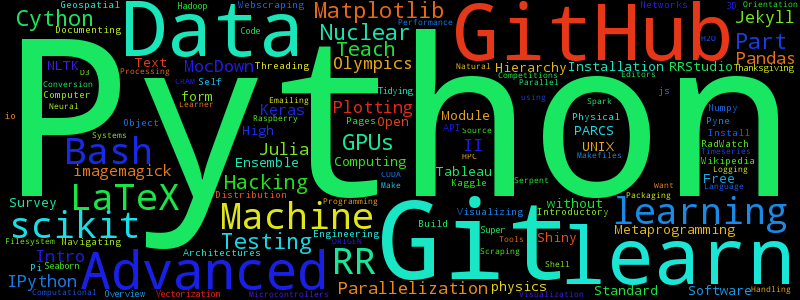

In [35]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=300, prefer_horizontal=1, stopwords=None).generate(text)
wordcloud.to_image()

The biggest keyword is Python. Let's get quantatitive:

- Frequency statistics: How many times does each word occur in the file?


1. For each word, we need to remember a number (number of occurances)
   
   Use dictionary. 

2. We will examine all words in the file (splitted into words).
   
   Use loop. 


In [36]:
freq_dict = {}

for word in words:
    freq_dict[word] = freq_dict.get(word, 0) + 1
    
print(freq_dict)

{'Pages': 1, 'imagemagick': 1, 'Metaprogramming': 1, 'Do': 1, 'with': 6, 'the': 2, 'Open': 1, 'Hadoop': 1, 'Pi': 1, 'Part': 2, 'Standard': 1, 'Hierarchy': 1, 'C++': 1, 'UNIX': 1, 'Installation': 1, 'GPUs': 2, 'Seaborn': 1, 'Computing': 1, 'Learning': 2, 'Makefiles': 1, 'Engineering': 1, 'So': 1, 'bash': 1, 'RR': 4, 'Tableau': 1, 'Parallel': 1, 'Module': 1, 'NLTK': 1, 'Nuclear': 2, 'Performance': 1, 'Where': 1, 'Packaging': 1, 'Ensemble': 1, '(Machine)': 1, 'RRStudio': 1, 'Bash': 3, 'in': 3, 'The': 4, 'Hacking': 1, 'Teach': 2, 'Documenting': 1, 'Build': 1, 'Survey': 1, 'Git': 7, 'Jekyll': 2, '3': 1, 'Physical': 1, 'Computer': 1, 'for': 2, 'Distribution': 1, 'You': 3, 'Introductory': 1, 'Learn': 2, 'HPC': 1, 'RadWatch': 1, 'Can': 1, 'Threading': 1, 'Navigating': 1, 'Networks': 1, 'Object': 1, 'Pyne': 1, 'Text': 1, 'Kaggle': 1, 'Architectures': 1, 'Matplotlib': 2, 'Programming': 1, 'Wikipedia': 1, 'Webscraping': 1, 'H2O': 1, 'CRAM': 1, 'Cython': 3, 'Visualization': 1, 'Visualizing': 1, 'P

In [37]:
print(freq_dict['Python'])
print(freq_dict['CUDA'])

13
1


Seems to be working. Let's make a function.

In [38]:
def freq(items):
    freq_dict = {}
    for word in items:
        freq_dict[word] = freq_dict.get(word, 0) + 1
    return freq_dict

The function `freq` is a mapping between a list and a dictionary,

where each key of the dictionary (output) is associated with the number of occurances
of the key in the list (input).

In [39]:
freq_dict = freq(words)
freq_freq = freq(freq_dict.values()) 

Q : what is in freq_freq?

In [40]:
print(freq_freq)

{1: 111, 2: 22, 3: 11, 4: 4, 5: 1, 6: 1, 7: 1, 28: 1, 13: 1}


Q: Which is the most frequent word?

Answer

In [41]:
top_word = ""
top_word_freq = 0
for word, freq in freq_dict.items():
    if freq > top_word_freq:
        top_word = word
        top_word_freq = freq
print('word', top_word, 'freq', top_word_freq)


word and freq 28


Using the `max` function avoids writing an `if`

In [43]:
most  = (0, None)
for word, freq in freq_dict.items():
    most = max([most, (freq, word)])
    
print(most)

(28, 'and')


final challenge: the 1 liner.

In [44]:
next(reversed(sorted((freq, word) for word, freq in freq_dict.items())))

(28, 'and')

## Exporting data

The world of Python has 4 corners.

We need to reach out to other applications.

Export the data from Python.

In [45]:
def save(filename, freq_dict):
    ff = open(filename, 'w')
    for word, freq in sorted(freq_dict.items()):
        ff.write("%s %s\n" % (word, freq))
    ff.close()

In [46]:
def save(filename, freq_dict):
    with open(filename, 'w') as ff:
        for word, freq in sorted(freq_dict.items()):
            ff.write("%s %s\n" % (word, freq))


In [47]:
save("freq_dict_thw.txt", freq_dict)

In [48]:
!cat freq_dict_thw.txt

& 4
(Machine) 1
(without 1
3 1
3D 1
A 1
Advanced 4
Architectures 1
Bash 3
Build 1
C++ 1
C/API 1
CRAM 1
CUDA 1
Can 1
Code 1
Competitions 1
Computational 1
Computer 1
Computing 1
Conversion 1
Cython 3
D3.js 1
Data 5
Distribution 1
Do 1
Documenting 1
Editors 1
Emailing 1
Engineering 1
Ensemble 1
Filesystem 1
For 1
Free-form 1
GPUs 2
Geospatial 1
Git 7
GitHub 3
Github 2
H2O 1
HPC 1
Hacking 1
Hadoop 1
Handling 1
Have 1
Hierarchy 1
High 1
II 2
IPython 2
Install 1
Installation 1
Intro 2
Introductory 1
Jekyll 2
Julia 2
Kaggle 1
Keras.io 1
LaTeX 3
Language 1
Learn 2
Learner 1
Learning 2
Logging 1
Machine 3
Make 1
Makefiles 1
Matplotlib 2
Metaprogramming 1
Microcontrollers 1
MocDown 2
Module 1
NLTK 1
Natural 1
Navigating 1
Networks 1
Neural 1
Nuclear 2
Numpy 1
ORIGEN 1
Object 1
Olympics 2
Open 1
Orientation 1
Overview 1
PARCS 1
Packaging 1
Pages 1
Pandas 2
Parallel 1
Parallelization 2
Part 2
Performance 1
Physical 1
Pi 1
Plotting 2
Processing 1
Programming 1
Pyne 1
Python 13
RR 4
RRStudio 1
RadW

In [49]:
save("freq_freq_thw.txt", freq_freq)

In [50]:
!cat freq_freq_thw.txt

1 111
2 22
3 11
4 4
5 1
6 1
7 1
13 1
28 1


## Reading file in with Pandas

In [51]:
import pandas as pd
dataframe = pd.read_table("freq_freq_thw.txt", sep=' ', header=None, index_col=0)
dataframe

,1
0,
1,111
2,22
3,11
4,4
5,1
6,1
7,1
13,1
28,1


In [52]:
%matplotlib inline

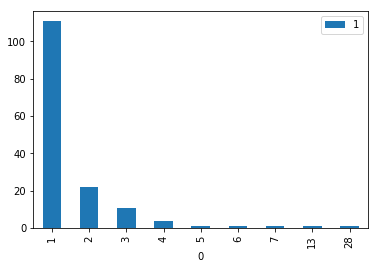

In [53]:
dataframe.plot(kind='bar')

In [57]:
import pandas as pd
dataframe = pd.read_table("freq_dict_thw.txt", sep=' ', header=None, index_col=0)

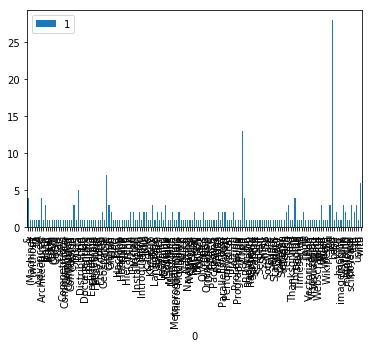

In [56]:
dataframe.plot(kind='bar')

Well, a busy plot is a busy plot...